Upload and Read the CSV file

In [ ]:
import csv
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# Function to read the CSV file
def read_csv(filename):
    items = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            items.append(float(row[0]))  # Use float to handle both integers and floating-point numbers
    return items

# Assuming the uploaded file is named 'items.csv'
items = read_csv('items(1).csv')
print(items[:10])  # Print the first 10 items to verify the contents


Saving items(1).csv to items(1) (2).csv
[36.6, 26.8, 36.6, 43.0, 26.3, 30.7, 41.4, 28.7, 29.9, 49.5]


Implement Random Restart Hill Climbing

In [ ]:
import random

# Function to perform the first-fit bin packing
def first_fit(items, bin_capacity):
    bins = []
    for item in items:
        placed = False
        for bin in bins:
            if sum(bin) + item <= bin_capacity:
                bin.append(item)
                placed = True
                break
        if not placed:
            bins.append([item])
    return bins

# Function to find a neighbor solution by moving an item from one bin to another
def neighbor(solution, bin_capacity):
    new_solution = [bin.copy() for bin in solution]
    bin1, bin2 = random.sample(range(len(new_solution)), 2)
    if not new_solution[bin1] or not new_solution[bin2]:
        return new_solution
    item = new_solution[bin1].pop(random.randrange(len(new_solution[bin1])))
    new_solution[bin2].append(item)
    if not new_solution[bin1]:
        del new_solution[bin1]
    return new_solution

# Function to calculate the cost of a solution (number of bins used)
def cost(solution):
    return len(solution)

# Random Restart Hill Climbing Algorithm
def random_restart_hill_climbing(items, bin_capacity, num_restarts):
    best_solution = first_fit(items, bin_capacity)
    best_cost = cost(best_solution)

    for _ in range(num_restarts):
        current_solution = first_fit(random.sample(items, len(items)), bin_capacity)
        current_cost = cost(current_solution)

        improving = True
        while improving:
            new_solution = neighbor(current_solution, bin_capacity)
            new_cost = cost(new_solution)
            if new_cost < current_cost:
                current_solution = new_solution
                current_cost = new_cost
            else:
                improving = False

        if current_cost < best_cost:
            best_solution = current_solution
            best_cost = current_cost

    return best_solution

# Parameters
bin_capacity = 100
num_restarts = 100

# Find the minimum number of bins required
bins = random_restart_hill_climbing(items, bin_capacity, num_restarts)

# Output the total number of bins used
print(f"Total number of bins used: {len(bins)}")

# Save the bin packing result to an external file
with open('bin_packing_result.txt', 'w') as file:
    for i, bin in enumerate(bins):
        file.write(f"Bin {i+1}: {bin}\n")


Total number of bins used: 84


 Check the Content of the Output File

In [ ]:
# Check the content of the output file
with open('bin_packing_result.txt', 'r') as file:
    content = file.read()
    print(content)


Bin 1: [36.6, 26.8, 36.6]
Bin 2: [43.0, 26.3, 30.7]
Bin 3: [41.4, 28.7, 29.9]
Bin 4: [49.5, 25.1, 25.4]
Bin 5: [47.4, 25.2, 27.4]
Bin 6: [37.0, 26.9, 36.1]
Bin 7: [47.3, 25.2, 27.5]
Bin 8: [47.2, 25.9, 26.9]
Bin 9: [44.4, 25.8, 29.8]
Bin 10: [43.9, 27.3, 28.8]
Bin 11: [44.5, 27.2, 28.3]
Bin 12: [41.9, 26.1, 32.0]
Bin 13: [36.3, 27.1, 36.6]
Bin 14: [35.5, 27.3, 37.2]
Bin 15: [46.6, 26.2, 27.2]
Bin 16: [35.7, 29.2, 35.1]
Bin 17: [39.5, 25.5, 35.0]
Bin 18: [35.0, 30.3, 34.7]
Bin 19: [45.0, 25.2, 29.8]
Bin 20: [41.0, 27.5, 31.5]
Bin 21: [40.7, 26.0, 33.3]
Bin 22: [36.6, 27.1, 36.3]
Bin 23: [35.0, 29.4, 35.6]
Bin 24: [48.0, 25.3, 26.7]
Bin 25: [44.6, 25.9, 29.5]
Bin 26: [37.6, 26.7, 35.7]
Bin 27: [36.6, 28.2, 35.2]
Bin 28: [47.8, 25.6, 26.6]
Bin 29: [42.0, 25.1, 32.9]
Bin 30: [43.4, 25.2, 31.4]
Bin 31: [47.0, 25.4, 27.6]
Bin 32: [49.7, 25.0, 25.3]
Bin 33: [49.7, 25.0, 25.3]
Bin 34: [44.5, 25.4, 30.1]
Bin 35: [41.2, 26.3, 32.5]
Bin 36: [40.0, 29.8, 30.2]
Bin 37: [36.2, 28.2, 35.6]
Bin 38: [4

Visualize the Performance

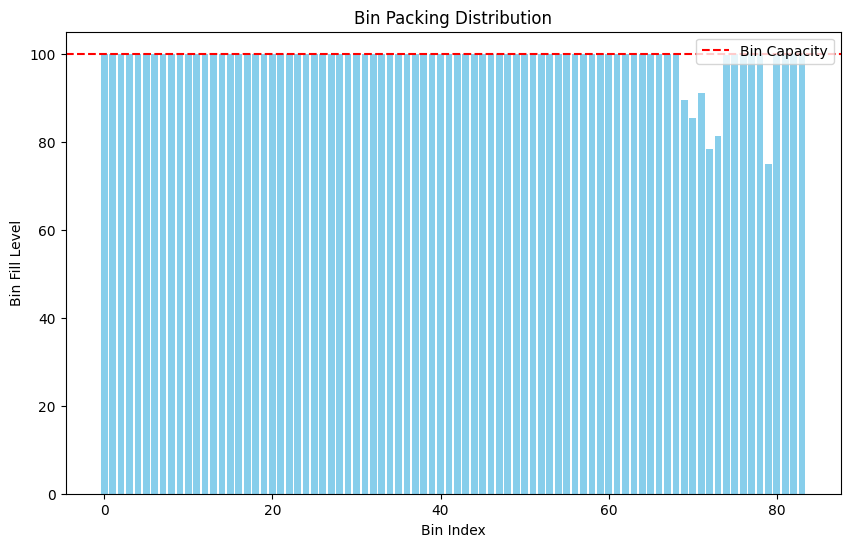

In [ ]:
import matplotlib.pyplot as plt

def plot_bins(bins, bin_capacity):
    bin_indices = range(len(bins))
    bin_sums = [sum(bin) for bin in bins]
    plt.figure(figsize=(10, 6))
    plt.bar(bin_indices, bin_sums, color='skyblue')
    plt.axhline(y=bin_capacity, color='r', linestyle='--', label='Bin Capacity')
    plt.xlabel('Bin Index')
    plt.ylabel('Bin Fill Level')
    plt.title('Bin Packing Distribution')
    plt.legend()
    plt.show()

# Visualize the bin distribution
plot_bins(bins, bin_capacity)


Download the Result File

In [ ]:
from google.colab import files
files.download('bin_packing_result.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>